# MNIST Example

In [24]:
from sklearn.datasets import fetch_mldata
from time import time

class t(object):
    def __init__(self):
        self.ctime=0
    def st(self):
        self.ctime = time()
    def it(self):
        print time() - self.ctime
        
zz = t()
start = zz.st
finish = zz.it

In [4]:
mnist = fetch_mldata('MNIST original')

In [5]:
X, y = mnist["data"], mnist["target"]
print X.shape
print y.shape

(70000L, 784L)
(70000L,)


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def PDigit(d):
    some_digit_image = d.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()
    
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

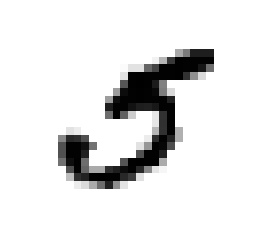

5.0


In [7]:
some_digit = X[36000]
PDigit(some_digit)
print y[36000]

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print X_train.shape
print X_test.shape

(60000L, 784L)
(10000L, 784L)


In [9]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
print y_train_5.shape

(60000L,)


In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print d

154


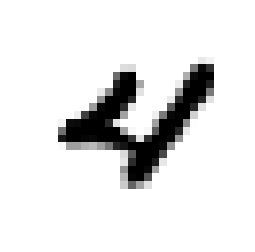

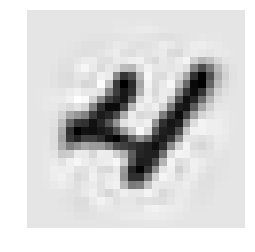

12.8040001392


In [25]:
start()
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])
finish()

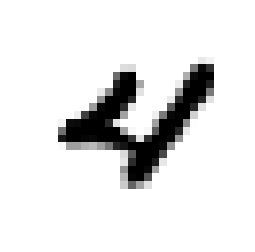

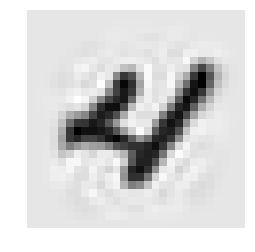

17.3990001678


In [26]:
from sklearn.decomposition import PCA

start()
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])
finish()

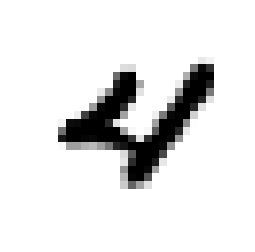

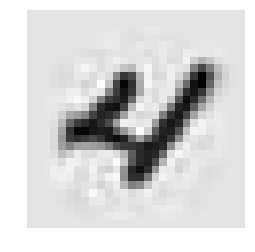

36.1930000782


In [27]:
from sklearn.decomposition import IncrementalPCA

start()
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
X_recovered = inc_pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])
finish()

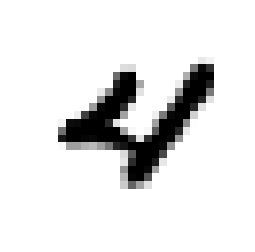

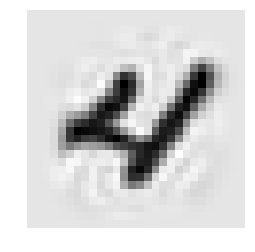

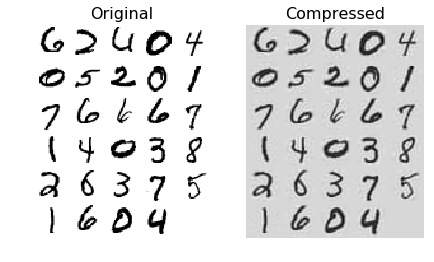

13.4330000877


In [28]:
from sklearn.decomposition import PCA
start()
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered =rnd_pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()
finish()

0.949872917242


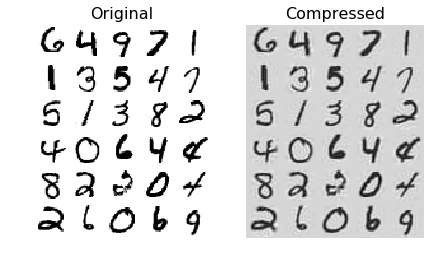

In [29]:
print sum(rnd_pca.explained_variance_ratio_)
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2000])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2000])
plt.title("Compressed", fontsize=16)
plt.show()

In [30]:
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_t = X_reduced[rnd_idx]
y_t = y_train[rnd_idx]

In [32]:
from sklearn.svm import SVC, LinearSVC

start()
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_t, y_t)
finish()

610.453999996


In [33]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_t)
accuracy_score(y_t, y_pred)

0.82066666666666666

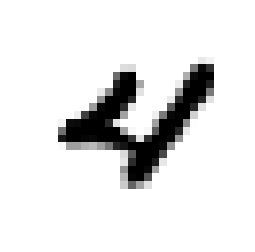

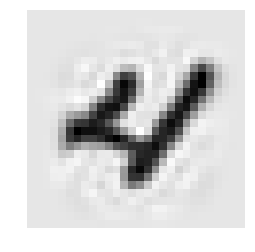

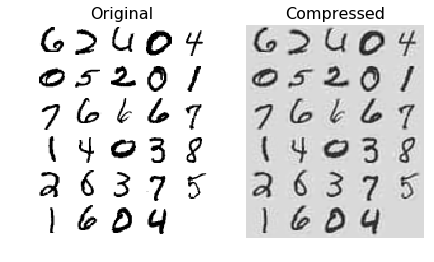

In [34]:
from sklearn.preprocessing import StandardScaler

rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered =rnd_pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [42]:
start()
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_t = X_reduced[rnd_idx]
y_t = y_train[rnd_idx]
finish()
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_t, y_t)
finish()

0.0769999027252
616.645999908


In [43]:

y_pred = lin_clf.predict(X_t)
accuracy_score(y_t, y_pred)

0.80698333333333339

In [44]:
X_test_reduced = PCA.transform(rnd_pca,X_test)
y_test_pred = lin_clf.predict(X_test_reduced)
accuracy_score(y_test, y_test_pred)

0.80659999999999998